# Fase 3: Preprocesamiento y Reducción de Dimensionalidad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA

In [2]:
df_ingresos = pd.read_csv('./income/datos_limpios.csv')
# Separar características (X) y variable objetivo (y)
X = df_ingresos.drop('ingreso', axis=1)
y = df_ingresos['ingreso']
df_ingresos.head()

,edad,clase_de_trabajo,peso_final,educacion,num_educacion,estado_civil,ocupacion,relacion,raza,sexo,ganancia_capital,perdidas_capital,horas_por_semana,ingreso,continente,grupo_edad
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,0,0,4356,40,0,América,Tercera Edad
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,0,América,Tercera Edad
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,0,0,4356,40,0,América,Tercera Edad
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,0,América,Mediana Edad
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,0,América,Mediana Edad


In [3]:
X.drop(columns=['educacion'], inplace=True)

In [4]:
columnas_numericas = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_categoricas = X.select_dtypes(include=['object']).columns.tolist()

print("Columnas Numéricas:", columnas_numericas)
print("Columnas Categóricas:", columnas_categoricas)

Columnas Numéricas: ['edad', 'peso_final', 'num_educacion', 'sexo', 'ganancia_capital', 'perdidas_capital', 'horas_por_semana']
Columnas Categóricas: ['clase_de_trabajo', 'estado_civil', 'ocupacion', 'relacion', 'raza', 'continente', 'grupo_edad']


### Codificación de variables categóricas

#### Clasficar Variables ordianales y nominales

In [5]:
columnas_categoricas_ordinales = []
columnas_categoricas_nominales = []

for col in columnas_categoricas:
  num_valores_unicos = X[col].nunique()
  print(f"Columna: {col}, Valores Únicos: {num_valores_unicos}")
  if num_valores_unicos <= 5:  # Umbral para considerar una variable como ordinal
    columnas_categoricas_ordinales.append(col)
  else:
    columnas_categoricas_nominales.append(col)

print("Columnas Categóricas Ordinales:", columnas_categoricas_ordinales)
print("Columnas Categóricas Nominales:", columnas_categoricas_nominales)

Columna: clase_de_trabajo, Valores Únicos: 8
Columna: estado_civil, Valores Únicos: 7
Columna: ocupacion, Valores Únicos: 14
Columna: relacion, Valores Únicos: 6
Columna: raza, Valores Únicos: 5
Columna: continente, Valores Únicos: 3
Columna: grupo_edad, Valores Únicos: 4
Columnas Categóricas Ordinales: ['raza', 'continente', 'grupo_edad']
Columnas Categóricas Nominales: ['clase_de_trabajo', 'estado_civil', 'ocupacion', 'relacion']


In [6]:
X.head()

,edad,clase_de_trabajo,peso_final,num_educacion,estado_civil,ocupacion,relacion,raza,sexo,ganancia_capital,perdidas_capital,horas_por_semana,continente,grupo_edad
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,White,0,0,4356,40,América,Tercera Edad
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,América,Tercera Edad
2,66,Private,186061,10,Widowed,Prof-specialty,Unmarried,Black,0,0,4356,40,América,Tercera Edad
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,América,Mediana Edad
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,América,Mediana Edad


#### Transformar variables categóricas nominales

In [7]:
model_one_hot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ingresos_one_hot = model_one_hot.fit_transform(X[columnas_categoricas_nominales])
df_ingresos_one_hot = pd.DataFrame(ingresos_one_hot, columns=model_one_hot.get_feature_names_out(columnas_categoricas_nominales))
df_ingresos_one_hot.head()

,clase_de_trabajo_Federal-gov,clase_de_trabajo_Local-gov,clase_de_trabajo_Never-worked,clase_de_trabajo_Private,clase_de_trabajo_Self-emp-inc,clase_de_trabajo_Self-emp-not-inc,clase_de_trabajo_State-gov,clase_de_trabajo_Without-pay,estado_civil_Divorced,estado_civil_Married-AF-spouse,...,ocupacion_Protective-serv,ocupacion_Sales,ocupacion_Tech-support,ocupacion_Transport-moving,relacion_Husband,relacion_Not-in-family,relacion_Other-relative,relacion_Own-child,relacion_Unmarried,relacion_Wife
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Transformar variables categóricas ordinales

In [8]:
model_label_encoder = LabelEncoder()
for col in columnas_categoricas_ordinales:
  X[col] = model_label_encoder.fit_transform(X[col])

X.head()


,edad,clase_de_trabajo,peso_final,num_educacion,estado_civil,ocupacion,relacion,raza,sexo,ganancia_capital,perdidas_capital,horas_por_semana,continente,grupo_edad
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,4,0,0,4356,40,0,3
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,4,0,0,4356,18,0,3
2,66,Private,186061,10,Widowed,Prof-specialty,Unmarried,2,0,0,4356,40,0,3
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,4,0,0,3900,40,0,2
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,4,0,0,3900,40,0,2


#### Merge df

In [9]:
X = X.drop(columns=columnas_categoricas_nominales)
X = pd.concat([X, df_ingresos_one_hot], axis=1)
X.head()

,edad,peso_final,num_educacion,raza,sexo,ganancia_capital,perdidas_capital,horas_por_semana,continente,grupo_edad,...,ocupacion_Protective-serv,ocupacion_Sales,ocupacion_Tech-support,ocupacion_Transport-moving,relacion_Husband,relacion_Not-in-family,relacion_Other-relative,relacion_Own-child,relacion_Unmarried,relacion_Wife
0,90,77053,9,4,0,0,4356,40,0,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,82,132870,9,4,0,0,4356,18,0,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,66,186061,10,2,0,0,4356,40,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,54,140359,4,4,0,0,3900,40,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,41,264663,10,4,0,0,3900,40,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Escalado o normalización de variables numéricas
- Se realiza transformación logarítmica a esas columnas ya que poseen mucho sesgo y ceros 
- Se selecciona RobustScaler ya que las variables numéricas presentan sesgos, es decir, no tienen un comportamiento gaussiano  

In [10]:
# Crear variables dummy
X['tiene_ganancia_capital'] = (X['ganancia_capital'] > 0).astype(int)
X['tiene_perdida_capital'] = (X['perdidas_capital'] > 0).astype(int)

# Aplicar logaritmo solo a valores > 0
X['ganancia_capital'] = X['ganancia_capital'].apply(lambda x: np.log(x) if x > 0 else 0)
X['perdidas_capital'] = X['perdidas_capital'].apply(lambda x: np.log(x) if x > 0 else 0)

In [11]:
estandarlizador = RobustScaler()
X[columnas_numericas] = estandarlizador.fit_transform(X[columnas_numericas])
X[columnas_numericas].head()

,edad,peso_final,num_educacion,sexo,ganancia_capital,perdidas_capital,horas_por_semana
0,2.65,-0.849686,-0.333333,-1.0,0.0,8.379309,0.0
1,2.25,-0.381517,-0.333333,-1.0,0.0,8.379309,-4.4
2,1.45,0.064626,0.000000,-1.0,0.0,8.379309,0.0
3,0.85,-0.318703,-2.000000,-1.0,0.0,8.268732,0.0
4,0.20,0.723906,0.000000,-1.0,0.0,8.268732,0.0


### Técnica LDA
El objetivo es clasificación binaria del ingreso 

In [12]:
n_componentes = 1
lda = LinearDiscriminantAnalysis(n_components=n_componentes)
X_lda = lda.fit_transform(X, y)

In [ ]:
df_lda = pd.DataFrame(X_lda, columns=[f'LD{i+1}' for i in range(n_componentes)])

In [17]:
df_lda['ingreso'] = y.values
df_lda.head()

,LD1,ingreso
0,2.010768,0
1,2.002907,0
2,1.974192,0
3,0.290103,0
4,1.644426,0


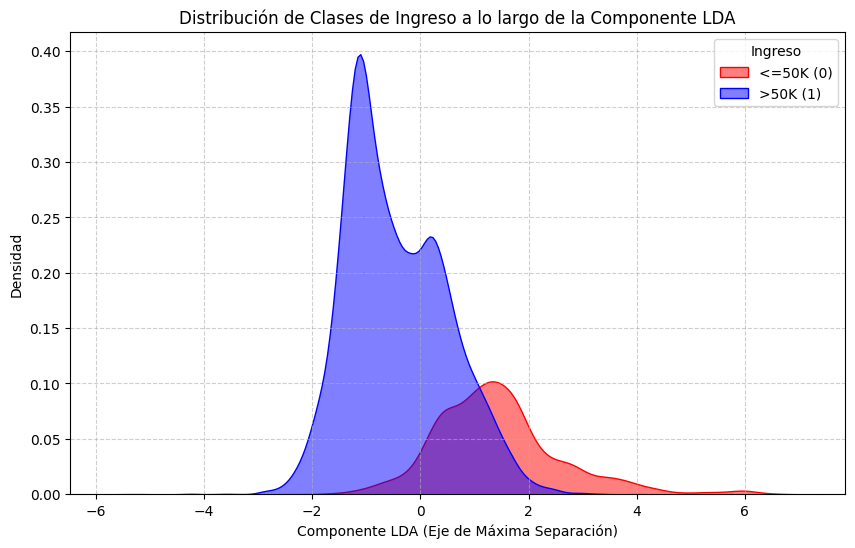

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_lda, 
    x='LD1', 
    hue='ingreso', 
    fill=True, 
    alpha=.5, 
    palette={0: 'blue', 1: 'red'}
)
plt.title('Distribución de Clases de Ingreso a lo largo de la Componente LDA')
plt.xlabel('Componente LDA (Eje de Máxima Separación)')
plt.ylabel('Densidad')
plt.legend(title='Ingreso', labels=['<=50K (0)', '>50K (1)'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show() 